### **Data Ingestion, Preliminary Data Analysis**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os

In [2]:
zip_path = r"C:\Users\Perpetual's World\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.printdir()

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [3]:
with zipfile.ZipFile(zip_path) as z:
  with z.open('winequality-white.csv') as f:
    white_wine = pd.read_csv(f, sep = ";")

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
num_features = white_wine.select_dtypes(include=['float64', 'int64']).columns

white_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [14]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [16]:
def quality_category(x):
  if x <= 4:
    return 'Low'
  elif x <= 6:
    return 'Medium'
  else:
    return 'High'
  
white_wine['quality_label'] = white_wine['quality'].apply(quality_category)

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [17]:
df = white_wine.copy()

### **Univariate analysis**

In [22]:
def univariate_numerical_eda(df, column):
  print(f" Feature: {column}")
  print("="*40)
  print(df[column].describe().to_frame())
  print(f"\nSkewness: {df[column].skew():.3f}")
  print(f"\nKurtosis: {df[column].kurt():.3f}")

  plt.figure(figsize=(12,4))

  # Histogram + KDE
  plt.subplot(1,2,1)
  sns.histplot(df[column], kde=True, bins=30, color='teal')
  plt.title(f'\n Distribution of {column}', fontsize=13)
  plt.xlabel(column)
  plt.ylabel('Frequency')

  # Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[column], color='teal')
  plt.title(f'\n Boxplot of {column}', fontsize=13)

  plt.tight_layout()
  plt.show()

  # Optional note on transformation
  if abs(df[column].skew()) > 1:
    print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
  elif abs(df[column].skew()) > 0.5:
    print(f"{column} is moderately skewed.")
  else:
    print(f"{column} is fairly symmetric.")


 Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648

Kurtosis: 2.172


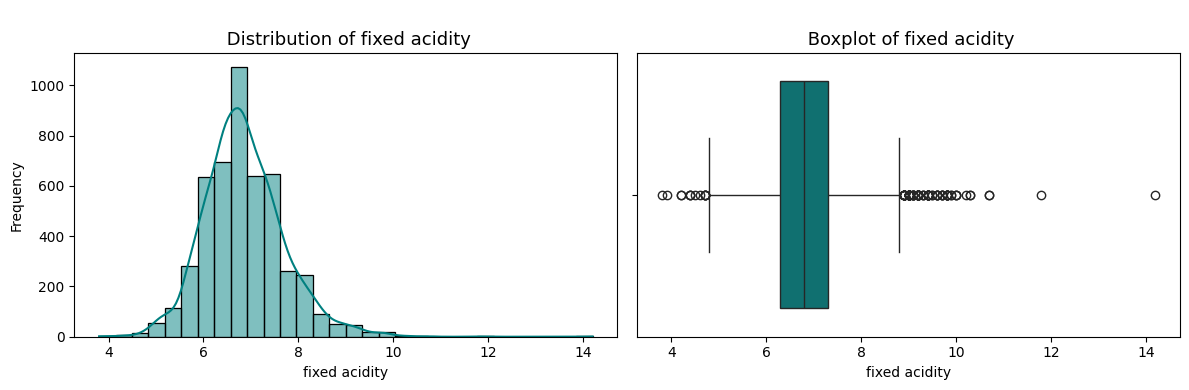

fixed acidity is moderately skewed.


In [23]:
# 1. Fixed Acidity
univariate_numerical_eda(df, 'fixed acidity')